# Librerías para el Manejo de Datos

## Pandas

Pandas es la librería que más nos facilita trabajar con datos usando una estructura de tablas con filas y columnas, similar a un archivo de excel.

### DataFrame

El principal objeto que introduce Pandas es el `DataFrame`

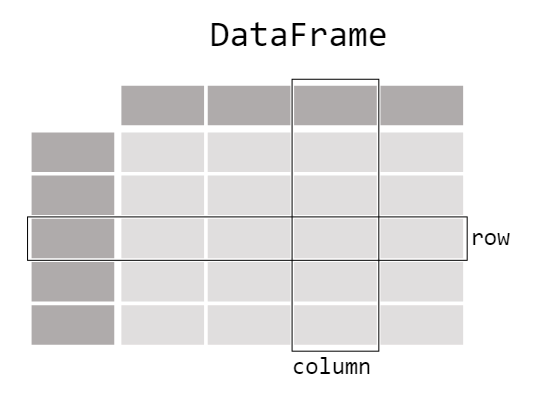

Una forma sencilla de crear un dataframe es utilizando un diccionario:

In [30]:
import pandas as pd

# puedo generar un DataFrame a partir de un diccionario
df = pd.DataFrame({"a" : [0, 1, 2, 4], "b" : [0, 2, 4, 16]})

print(type(df))

df

<class 'pandas.core.frame.DataFrame'>


,a,b
0,0,0
1,1,2
2,2,4
3,4,16


Cada DataFrame tendrá también un índice o `index` para diferenciar entre las diferentes filas. Si no lo proporcionamos se creará uno automaticamente partiendo desde el cero.

In [31]:
import pandas as pd

# puedo especificar el índice 
df = pd.DataFrame(
    {"col_a" : [0, 1, 2, 3, 4, 5], "col_b" : [0, 1, 4, 9, 16, 25]}, 
    index=[
        "index_a", "index_b", "index_c", "index_d", "index_e", "index_f"
    ]
)

df

,col_a,col_b
index_a,0,0
index_b,1,1
index_c,2,4
index_d,3,9
index_e,4,16
index_f,5,25


### ¿Qué puedo hacer con un DataFrame?

Dos métodos muy útiles para dar un vistazo rapido a nuestros datos son  `.info()` y `.describe()`:

* `info()` nos lista las columnas y los tipos de datos
* `describe()` nos da estadísticas básicas de las columnas numéricas

In [32]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, index_a to index_f
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col_a   6 non-null      int64
 1   col_b   6 non-null      int64
dtypes: int64(2)
memory usage: 144.0+ bytes


In [33]:
df.describe()

,col_a,col_b
count,6.000000,6.000000
mean,2.500000,9.166667
std,1.870829,9.745084
min,0.000000,0.000000
25%,1.250000,1.750000
50%,2.500000,6.500000
75%,3.750000,14.250000
max,5.000000,25.000000


También existen varios métodos que nos dan estadísiticas de las columnas numéricas como  `mean(), median(), max(), min(), quantile(q)`

In [34]:
# Media
df.mean()

col_a    2.500000
col_b    9.166667
dtype: float64

In [35]:
# Mediana
df.median()

col_a    2.5
col_b    6.5
dtype: float64

### Agregar Nuevas Columnas

In [36]:
# Puedo crear una nueva columna a partir de otras:
df["suma"] = df.col_a + df.col_b 

# También puedo asignar una constante que se repetirá a lo largo de las filas
df["constante"] = 42

df

,col_a,col_b,suma,constante
index_a,0,0,0,42
index_b,1,1,2,42
index_c,2,4,6,42
index_d,3,9,12,42
index_e,4,16,20,42
index_f,5,25,30,42


### Graficar un DataFrame

Podemos usar el método `.plot()` para graficar las columnas con respecto al índice.

<Axes: >

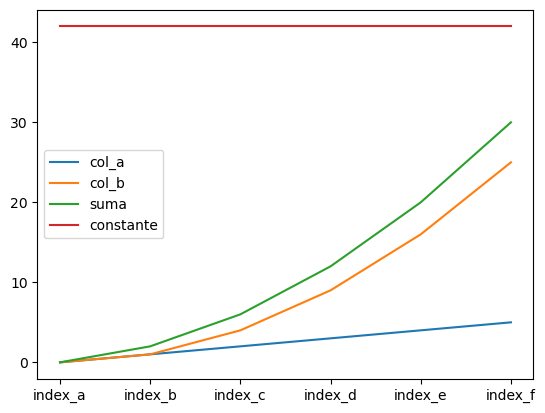

In [37]:
df.plot()

<Axes: xlabel='col_b', ylabel='col_a'>

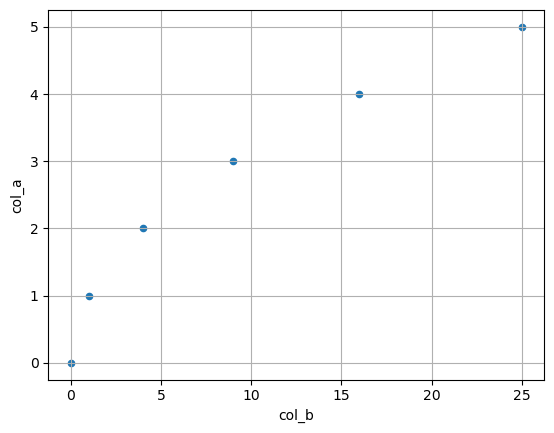

In [38]:
# También podemos graficar una columna con respecto a otra, y cambiar el tipo de plot
df.plot(x="col_b", y="col_a", kind="scatter", grid=True)

array([[<Axes: title={'center': 'col_a'}>,
        <Axes: title={'center': 'col_b'}>],
       [<Axes: title={'center': 'suma'}>,
        <Axes: title={'center': 'constante'}>]], dtype=object)

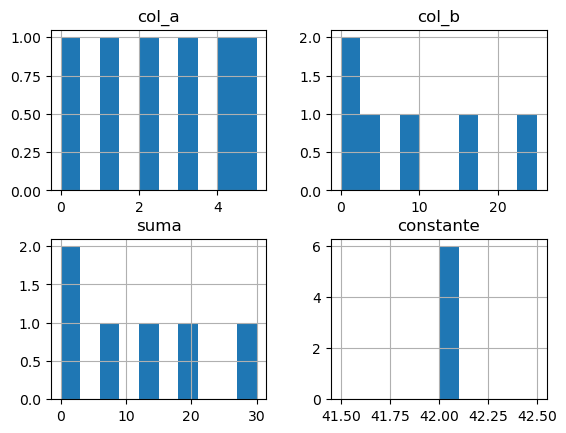

In [39]:
df.hist()

### Acceder a los elemenos de un DataFrame

Podemos acceder a las columnas de un DataFrame usando la notación de corchetes, y en algunos casos la notación de punto (siempre que el nombre de la columna no tenga símbolos inválidos)

``` python
df["col"] == df.col # Ambas notaciones acceden a la columna de nombre 'col'
```

In [40]:
# Notación de Corchetes
print(df["col_a"] )

# Notación de Punto
print(df.col_a)

index_a    0
index_b    1
index_c    2
index_d    3
index_e    4
index_f    5
Name: col_a, dtype: int64
index_a    0
index_b    1
index_c    2
index_d    3
index_e    4
index_f    5
Name: col_a, dtype: int64


In [41]:
type(df["col_a"]) 

pandas.core.series.Series

Cada columna de un DataFrame es otro tipo de dato llamado `Series`, que mantiene el índice y los datos de la columna en cuestión.
Una vez que accedemos a una columna podemos volver a usar la misma notación que antes para seleccionar una fila específica:



``` python
df["col"]["index_a"] == df.col.index_b # Ambas notaciones acceden a la columna de nombre 'col'
```


In [42]:
# Notación de Corchetes
print(df["col_b"]["index_c"] )

# Notación de Punto
print(df.col_b.index_c)

4
4


Una mejor forma de acceder a los elementos es utilizando las propiedades `.loc[]` e `.iloc[]`

* `.loc[]` nos permite acceder a una fila y columna especifica utilizando los nombres de la fila y la columna.
* `.iloc[]` nos permite acceder a una fila y columna especifica a partir de la ubicación de la fila y la columna, donde 0 representa la primera posición.

``` python

df.loc["index_a", "col_b"] # fila 'index_a', columna 'col_b'
df.iloc[0, 1] # primera fila, segunda columna

```
 
En ambos casos puedo seleccionar varias filas y/o columnas usando corchetes extras:

``` python

df.loc[["index_a", "index_d"], "col_b"] # dos indices y una columna
df.iloc[0, [1, 3]] # primera fila de la segunda y cuarta columna

```


In [43]:
# Selecciono un índice y una columna
df.loc["index_a", "col_b"]

0

In [44]:
# eleccino dos índices y una columna
df.loc[["index_a", "index_c"], "col_b"]

index_a    0
index_c    4
Name: col_b, dtype: int64

In [45]:
# Seleccino dos índices y todas las columnas
df.loc[["index_a", "index_c"], :]

,col_a,col_b,suma,constante
index_a,0,0,0,42
index_c,2,4,6,42


In [46]:
# primer, tercer y cuarta filas para todas las columnas
df.iloc[[0, 2, 3], :] 

,col_a,col_b,suma,constante
index_a,0,0,0,42
index_c,2,4,6,42
index_d,3,9,12,42


** Nota: Los nombres de columnas son únicos, pero dos filas pueden tener un mísmo índice. Es decir que el índice puede repetirse, aunque no es lo ideal.

### Guardar y Cargar Datos

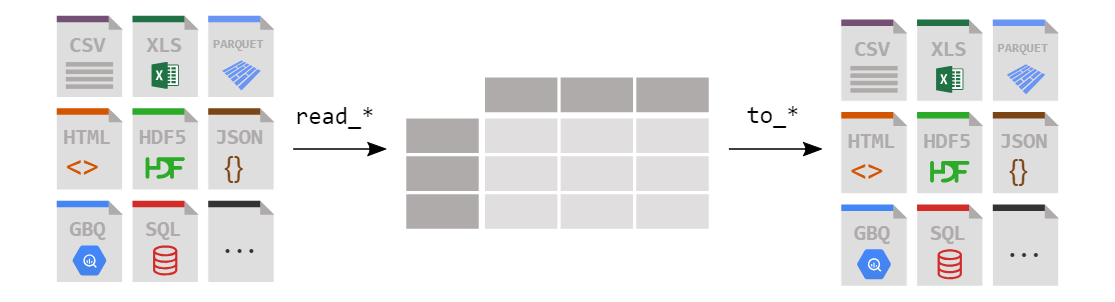

Podemos guardar un DataFrame en diferentes formatos. Por ejemplo un archivo [`.csv` (comma-separated values)](https://es.wikipedia.org/wiki/Valores_separados_por_comas) es una opción muy utilizada para guardar datos en formato de tablas, que es compatible con excel y similares (google sheets, LibreOffice, OpenOffice, etc)

* Para guardar un archivo usamos el método `.to_csv(<ruta_archivo>)`
* Para cargar datos de un .csv usamos la función `pd.read_csv(<ruta_archivo>)`

``` python
# Creamos (o sobreescribimos) un .csv a partir de un dataframe
df.to_csv("c://datos/mis_datos.csv")

# Creamos un dataframe a partir de un .csv
df = pd.read_csv("datos.csv")
```

In [47]:
df.to_csv("ejemplo.csv") # por defecto guarda el índice como una columna extra

In [48]:
pd.read_csv("ejemplo.csv") 

,Unnamed: 0,col_a,col_b,suma,constante
0,index_a,0,0,0,42
1,index_b,1,1,2,42
2,index_c,2,4,6,42
3,index_d,3,9,12,42
4,index_e,4,16,20,42
5,index_f,5,25,30,42


In [49]:
# podemos indicarle que la primera columna es el índice
pd.read_csv("ejemplo.csv", index_col=0) 

,col_a,col_b,suma,constante
index_a,0,0,0,42
index_b,1,1,2,42
index_c,2,4,6,42
index_d,3,9,12,42
index_e,4,16,20,42
index_f,5,25,30,42


### Cargando un Excel

Veamos un ejemplo cargando un archivo de excel


In [50]:
# Empecemos cargando un dataset más complejo desde excel
filepath = "../datos/Employee Sample Data.xlsx"
df = pd.read_excel(filepath, index_col=0)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, E02387 to E03545
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Full Name      1000 non-null   object        
 1   Job Title      1000 non-null   object        
 2   Department     1000 non-null   object        
 3   Business Unit  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Ethnicity      1000 non-null   object        
 6   Age            1000 non-null   int64         
 7   Hire Date      1000 non-null   datetime64[ns]
 8   Annual Salary  1000 non-null   int64         
 9   Bonus %        1000 non-null   float64       
 10  Country        1000 non-null   object        
 11  City           1000 non-null   object        
 12  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 109.4+ KB


In [52]:
# vamos a explorar los datos
df.head() # nos muestra las primeras 5 filas de datos

,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
EEID,,,,,,,,,,,,,
E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [53]:
df.describe()

,Age,Hire Date,Annual Salary,Bonus %,Exit Date
count,1000.000000,1000,1000.000000,1000.000000,85
mean,44.382000,2012-04-07 02:54:14.400000,113217.365000,0.088660,2016-11-02 18:04:14.117647104
min,25.000000,1992-01-09 00:00:00,40063.000000,0.000000,1994-12-18 00:00:00
25%,35.000000,2007-02-14 00:00:00,71430.250000,0.000000,2014-12-25 00:00:00
50%,45.000000,2014-02-15 12:00:00,96557.000000,0.000000,2019-05-23 00:00:00
75%,54.000000,2018-06-22 00:00:00,150782.250000,0.150000,2021-04-09 00:00:00
max,65.000000,2021-12-26 00:00:00,258498.000000,0.400000,2022-08-17 00:00:00
std,11.246981,NaN,53545.985644,0.117856,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, E02387 to E03545
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Full Name      1000 non-null   object        
 1   Job Title      1000 non-null   object        
 2   Department     1000 non-null   object        
 3   Business Unit  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Ethnicity      1000 non-null   object        
 6   Age            1000 non-null   int64         
 7   Hire Date      1000 non-null   datetime64[ns]
 8   Annual Salary  1000 non-null   int64         
 9   Bonus %        1000 non-null   float64       
 10  Country        1000 non-null   object        
 11  City           1000 non-null   object        
 12  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 109.4+ KB


### NaNs y NaTs

NaN y NaT son dos tipos de datos que se utilizan para representar la ausencia de datos

NaN: Not a Number
NaT: Not a Time

Ver: https://pandas.pydata.org/docs/user_guide/missing_data.html

In [55]:
df.Country.unique()

array(['United States', 'China', 'Brazil'], dtype=object)

In [56]:
df_nan = pd.DataFrame({"col_a": [1, 4, None, 16, 25]})

df_nan

,col_a
0,1.0
1,4.0
2,NaN
3,16.0
4,25.0


In [57]:
# Borrar lineas con NaNs
df_nan.dropna()

,col_a
0,1.0
1,4.0
3,16.0
4,25.0


In [58]:
# Rellenar NaNs con un valor constante
df_nan.fillna(42)

,col_a
0,1.0
1,4.0
2,42.0
3,16.0
4,25.0


In [59]:
# Interpolar valroes faltantes usando el método lineal
df_nan.interpolate(method="linear")

,col_a
0,1.0
1,4.0
2,10.0
3,16.0
4,25.0


In [60]:
# Interpolar valroes faltantes usando el método cuadrático
df_nan.interpolate(method="quadratic")

,col_a
0,1.0
1,4.0
2,9.0
3,16.0
4,25.0


In [61]:
# Notar que no modificamos el dataframe original
df_nan

,col_a
0,1.0
1,4.0
2,NaN
3,16.0
4,25.0


### Selección e Indexado

In [62]:
df.head()

,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
EEID,,,,,,,,,,,,,
E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [63]:
df["Country"]["E04105"] # Primero columna, luego fila (índice)

'China'

In [64]:
df.loc["E04105", "Country"] # Primero Fila (índice), luego columna

'China'

In [65]:
df.iloc[1, 10]  # Indices de la fila y la columna

'China'

In [66]:
df.iloc[10:15, :]   # Todas las columnas, filas 10 a 14

,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
EEID,,,,,,,,,,,,,
E00591,Savannah Ali,Sr. Manger,Human Resources,Manufacturing,Female,Asian,36,2009-02-11,157333,0.15,United States,Miami,NaT
E03344,Camila Rogers,Controls Engineer,Engineering,Speciality Products,Female,Caucasian,27,2021-10-21,109851,0.00,United States,Seattle,NaT
E00530,Eli Jones,Manager,Human Resources,Manufacturing,Male,Caucasian,59,1999-03-14,105086,0.09,United States,Austin,NaT
E04239,Everleigh Ng,Sr. Manger,Finance,Research & Development,Female,Asian,51,2021-06-10,146742,0.10,China,Shanghai,NaT
E03496,Robert Yang,Sr. Analyst,Accounting,Speciality Products,Male,Asian,31,2017-11-04,97078,0.00,United States,Austin,2020-03-09


In [67]:
df.loc[:, ["Country", "Age"]] # Todas las filas, columnas "Country" y "Age"

,Country,Age
EEID,,
E02387,United States,55
E04105,China,59
E02572,United States,50
E02832,United States,26
E01639,United States,55
...,...,...
E03094,United States,33
E01909,China,44
E04398,United States,31


#### Filtrando

Puedo filtrar los elementos de un DataFrame usando operadores de comparación para cerar condiciones:

In [68]:
df[df["Age"] < 26]

,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
EEID,,,,,,,,,,,,,
E04332,Luke Martin,Analyst,Finance,Manufacturing,Male,Black,25,2020-05-16,41336,0.00,United States,Miami,2021-05-20
E02862,Peyton Huang,Sr. Manger,IT,Manufacturing,Female,Asian,25,2021-07-02,125633,0.11,China,Beijing,NaT
E04288,Ella White,Development Engineer,Engineering,Manufacturing,Female,Caucasian,25,2020-01-20,71359,0.00,United States,Phoenix,NaT
E04359,Greyson Lam,Vice President,Accounting,Manufacturing,Male,Asian,25,2021-02-08,198243,0.31,United States,Miami,NaT
E01896,Adam Nelson,Director,Finance,Speciality Products,Male,Caucasian,25,2020-01-14,168014,0.27,United States,Chicago,2021-07-27
E01466,Connor Vang,Analyst,Sales,Speciality Products,Male,Asian,25,2021-07-28,46845,0.00,United States,Miami,NaT
E04290,Hannah Gomez,Technical Architect,IT,Manufacturing,Female,Latino,25,2021-05-11,83934,0.00,United States,Miami,NaT
E04165,Sophie Vang,Sr. Manger,Marketing,Manufacturing,Female,Asian,25,2021-09-14,136810,0.14,China,Chongqing,NaT
E03971,Lillian Chen,Sr. Manger,Marketing,Research & Development,Female,Asian,25,2020-04-09,157057,0.10,United States,Columbus,NaT


Para multiples condiciones tengo que usar paréntesis 

```
& : and
| : or
```

In [69]:
df[(df["Age"] < 26) & (df["Department"] == "Engineering")]

,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
EEID,,,,,,,,,,,,,
E04288,Ella White,Development Engineer,Engineering,Manufacturing,Female,Caucasian,25,2020-01-20,71359,0.0,United States,Phoenix,NaT
E01242,Emery Doan,Controls Engineer,Engineering,Corporate,Female,Asian,25,2021-06-23,86464,0.0,China,Shanghai,NaT
E02696,Ryan Lu,Development Engineer,Engineering,Speciality Products,Male,Asian,25,2021-07-08,67275,0.0,United States,Columbus,NaT


In [70]:
df[(df["Age"] < 26) | (df["Age"] > 60)]

,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
EEID,,,,,,,,,,,,,
E04332,Luke Martin,Analyst,Finance,Manufacturing,Male,Black,25,2020-05-16,41336,0.00,United States,Miami,2021-05-20
E00163,Bella Powell,Director,Finance,Research & Development,Female,Black,65,2002-03-04,175837,0.20,United States,Phoenix,NaT
E00884,Camila Silva,Sr. Manger,Marketing,Speciality Products,Female,Latino,64,2003-12-01,154828,0.13,United States,Seattle,NaT
E04116,David Barnes,Director,IT,Corporate,Male,Caucasian,64,2013-11-03,186503,0.24,United States,Columbus,NaT
E03343,Carson Lu,Engineering Manager,Engineering,Speciality Products,Male,Asian,64,1996-12-04,99354,0.12,China,Beijing,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
E03718,Zoe Zhou,Manager,Finance,Corporate,Female,Asian,61,2009-10-06,103096,0.07,China,Beijing,NaT
E00481,Jameson Nelson,Network Architect,IT,Research & Development,Male,Caucasian,61,2016-03-08,96566,0.00,United States,Columbus,NaT
E00785,Hannah Hoang,Manager,Accounting,Speciality Products,Female,Asian,25,2021-12-15,114893,0.06,China,Chengdu,NaT


### Graficando un DataFrame

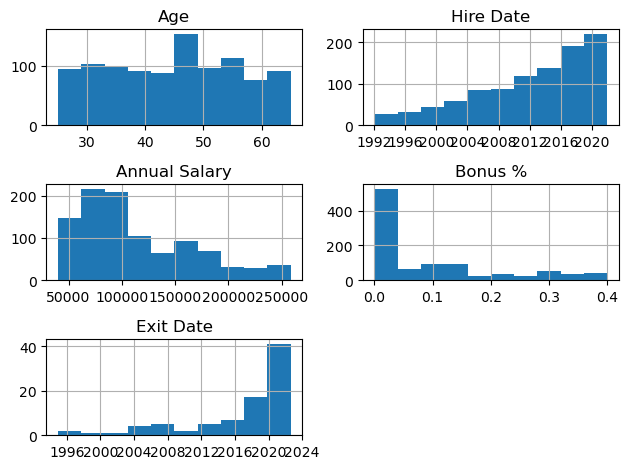

In [73]:
import matplotlib.pyplot as plt

axs = df.hist()
plt.tight_layout()

### Seaborn

Seaborn es una librería construida sobre Matplotlib que es muy útil para graficar dataframes. Sobre todo cuando queremos dar un vistazo rapido a los datos numéricos

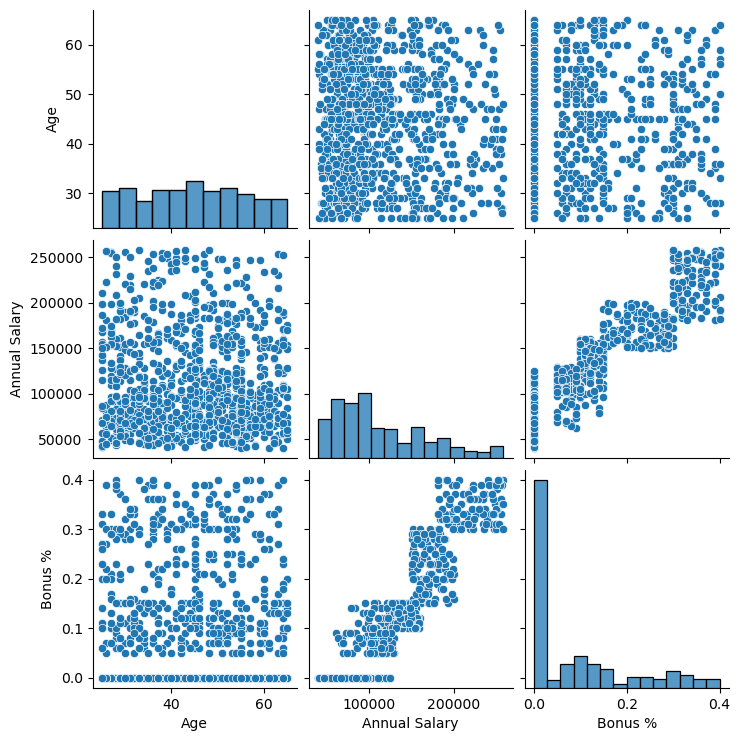

In [ ]:
import seaborn as sns

sns.pairplot(df)

## Matplotlib

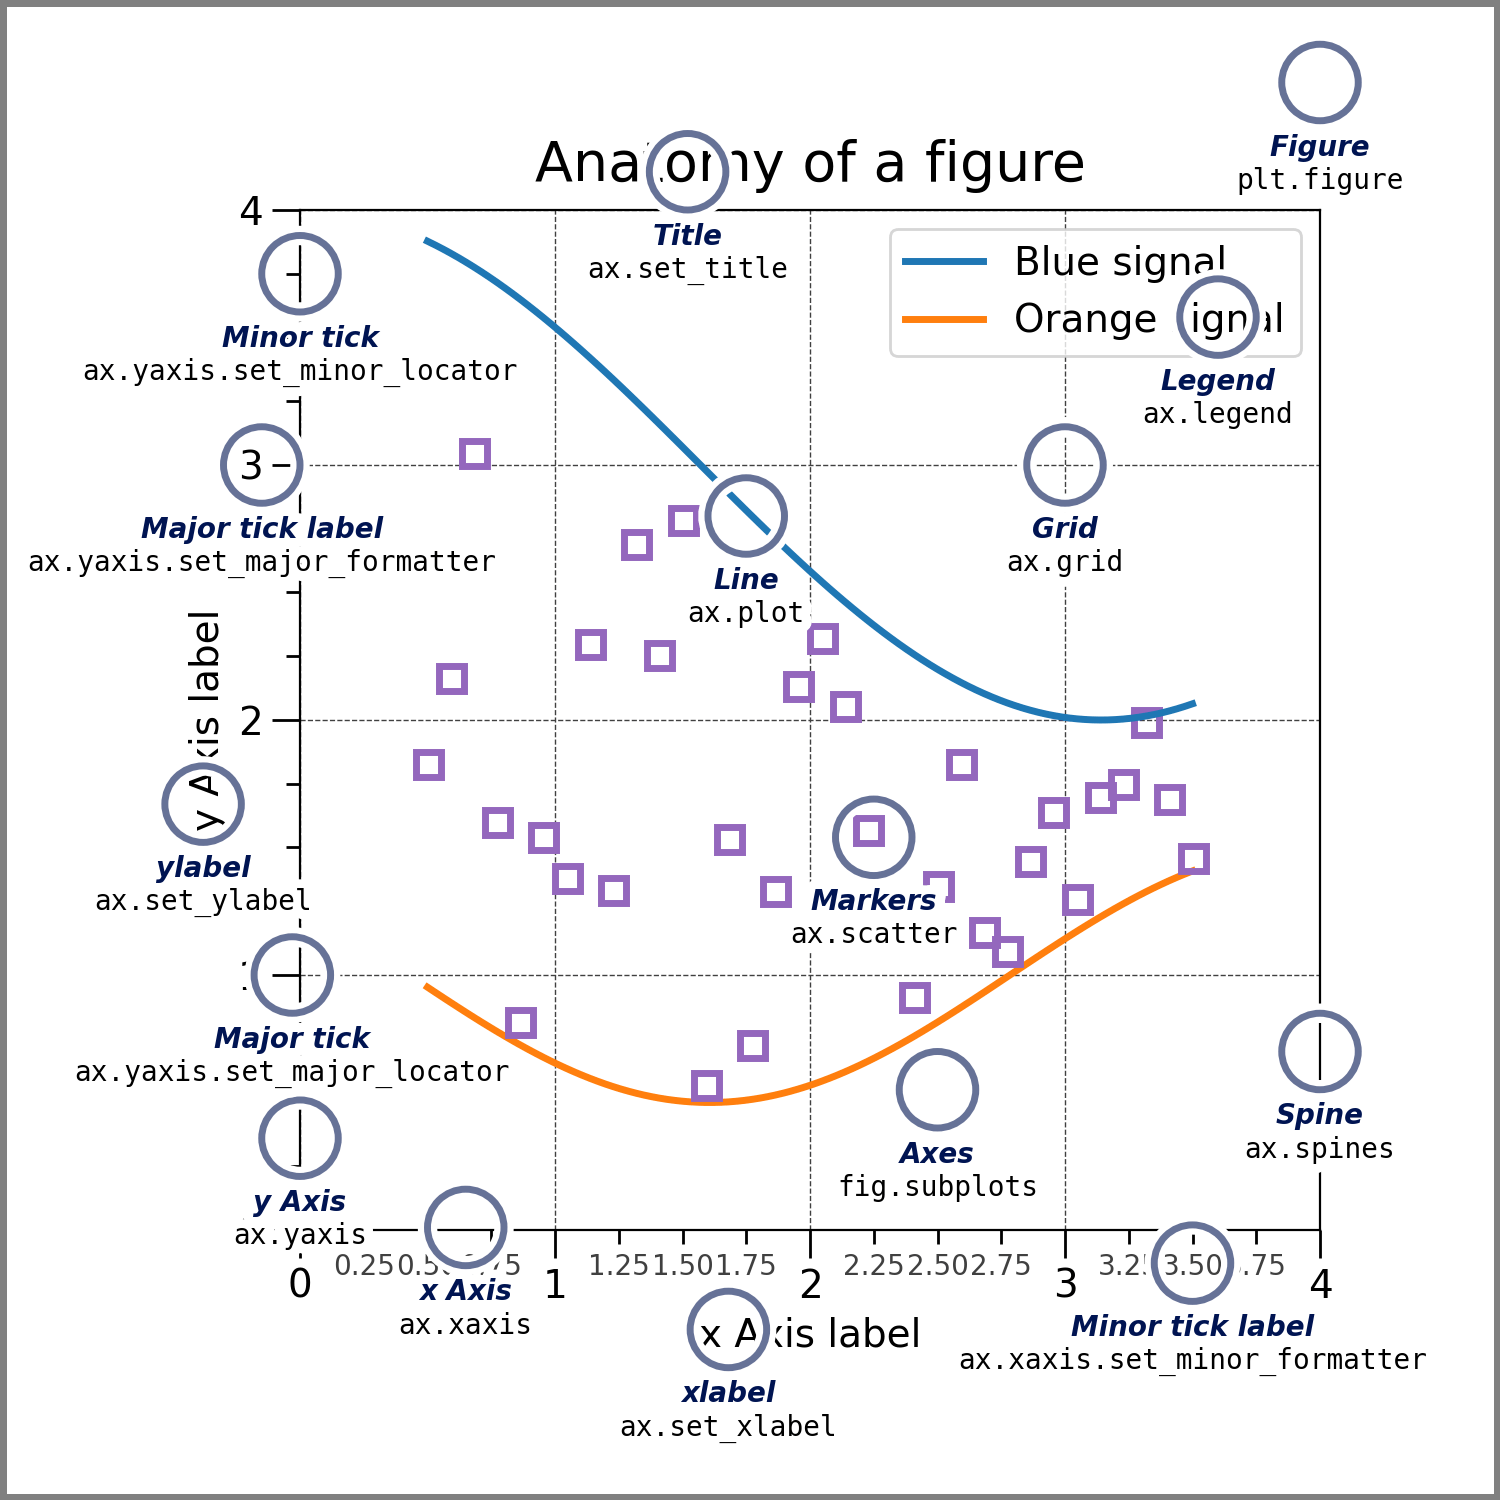

### API funcional


Es la forma más sencilla pero no tan recomendada, ya que nos da menos control

Text(0, 0.5, 'sen(x)')

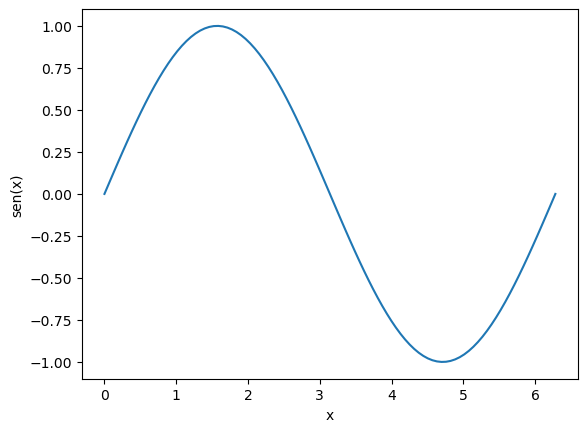

In [ ]:
import numpy as np 

# Genero datos
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# Plot
plt.plot(x, y)

# Configuro el plot (opcional)
plt.xlabel("x")
plt.ylabel("sen(x)")


### API Orientada a Objetos

Text(0, 0.5, 'sen(x)')

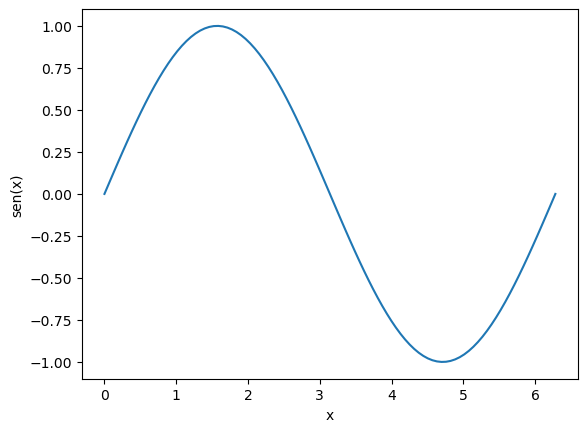

In [ ]:
import matplotlib.pyplot as plt


import numpy as np 

# Genero datos
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# Creo una figura y un Axes
fig, ax = plt.subplots()
# plot
ax.plot(x, y)  

# Configuro el plot (opcional)
ax.set_xlabel("x")
ax.set_ylabel("sen(x)")


Agregando datos con ruido

Text(0, 0.5, 'sen(x)')

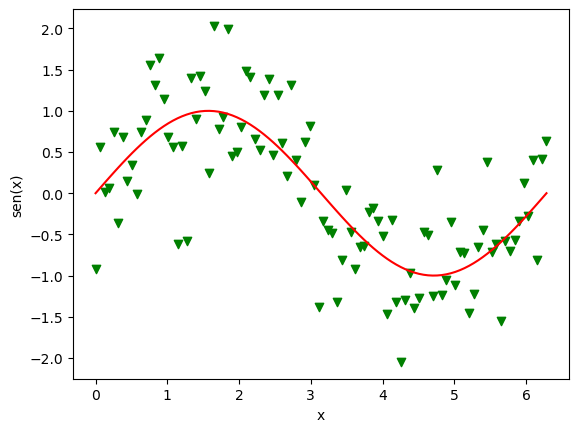

In [ ]:
import matplotlib.pyplot as plt


import numpy as np 

# Genero datos
x = np.linspace(0, 2*np.pi, 100)
y_real = np.sin(x) 
ruido = np.random.normal(0, 0.5, 100)
y_medida = y_real + ruido


# Creo una figura y un Axes
fig, ax = plt.subplots()
# plot
ax.plot(x, y_real, color="red", label="Valor real")  
ax.scatter(x, y_medida, c="green", label="Valor medido", marker="v")

# Configuro el plot (opcional)
ax.set_xlabel("x")
ax.set_ylabel("sen(x)")
#ax.legend()
#ax.grid()


Vamos a generar datos aleatorios para graficar

c:\Users\eliaz\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


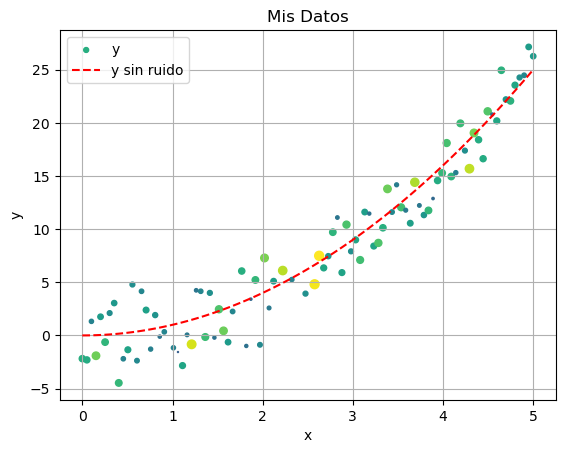

In [ ]:
import numpy as np
from numpy import random

# generemos datos
N = 100
x = np.linspace(0, 5, N)
ruido = random.normal(0, 2, N)
y = x**2 + ruido
tamanio = 15 + random.normal(0, 10, N)

# grafiquemos
fig, ax = plt.subplots()

ax.scatter(x, y, s=tamanio, c=tamanio, label = "y")#, cmap="hot")
ax.plot(x, y - ruido, label = "y sin ruido", color="red", linestyle="dashed")
ax.set(xlabel="x",
       ylabel="y",
       title="Mis Datos")
ax.legend()
ax.grid()


### Agregando una Barra de Color

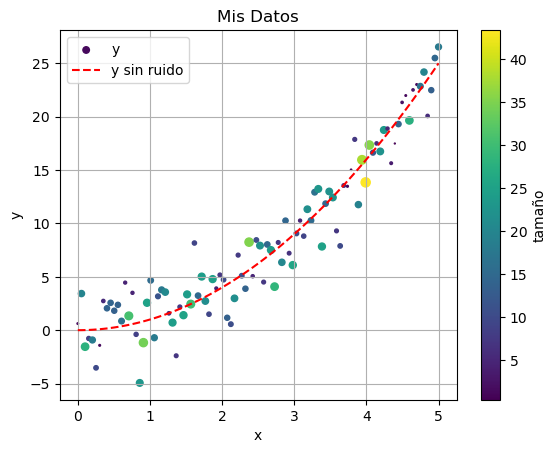

In [ ]:
import numpy as np
from numpy import random

# generemos datos
N = 100
x = np.linspace(0, 5, N)
ruido = random.normal(0, 2, N)
y = x**2 + ruido
tamanio = np.abs(15 + random.normal(0, 10, N))

# grafiquemos
fig, ax = plt.subplots()

scatter = ax.scatter(x, y, s=tamanio, c=tamanio, label = "y")
ax.plot(x, y - ruido, label = "y sin ruido", color="red", linestyle="dashed")
ax.set(xlabel="x",
       ylabel="y",
       title="Mis Datos")
ax.legend()
ax.grid()
fig.colorbar(scatter, label="tamaño")

### Guardar una figura

Para guardar una figura podemos usar

``` python
fig.savefig("figura.png")
``` 
o
``` python
plt.savefig("figura.png")
``` 

In [ ]:
fig.savefig("ejemplo.png")

### Subplots en una figura

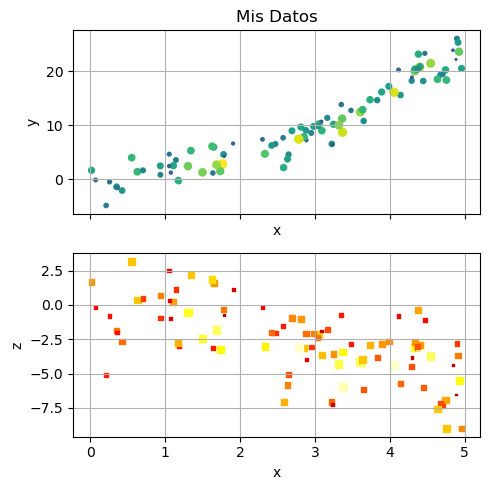

In [ ]:
import numpy as np
from numpy import random

# generemos datos
N = 100
x = random.uniform(0, 5, N)
ruido = random.normal(0, 2, N)
y = x**2 + ruido
tamanio = 15 + random.normal(0, 10, N)
z = -x + ruido

# grafiquemos
fig, axs = plt.subplots(2, layout="tight", sharex=True, figsize=(5, 5))

# axs[0]
axs[0].scatter(x, y, s=tamanio, c=tamanio)
axs[0].set(
    xlabel="x",
    ylabel="y",
    title="Mis Datos"
)
axs[0].grid()


# axs[1]
axs[1].scatter(x, z, s=tamanio, c=tamanio, marker="s", cmap="hot")
axs[1].set_xlabel("x")
axs[1].set_ylabel("z")
axs[1].grid()


Ahora dos plots en una sola fila

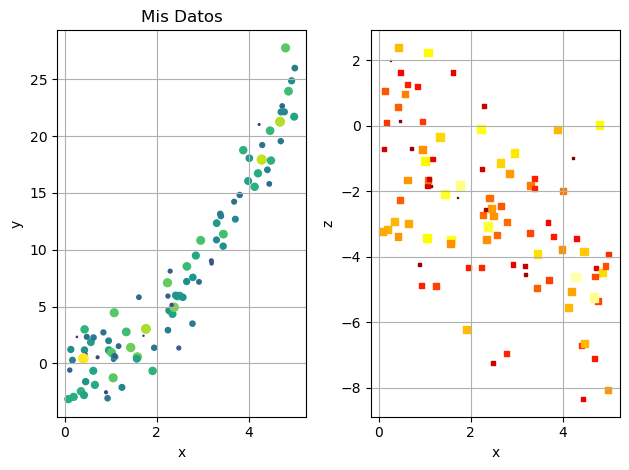

In [ ]:
import numpy as np
from numpy import random

# generemos datos
N = 100
x = random.uniform(0, 5, N)
ruido = random.normal(0, 2, N)
y = x**2 + ruido
tamanio = 15 + random.normal(0, 10, N)
z = -x + ruido

# grafiquemos
fig, axs = plt.subplots(1, 2, layout="tight")

# axs[0]
axs[0].scatter(x, y, s=tamanio, c=tamanio)
axs[0].set(
    xlabel="x",
    ylabel="y",
    title="Mis Datos"
)
axs[0].grid()


# axs[1]
axs[1].scatter(x, z, s=tamanio, c=tamanio, marker="s", cmap="hot")
axs[1].set_xlabel("x")
axs[1].set_ylabel("z")
axs[1].grid()


Hagamos dos filas y dos columnas

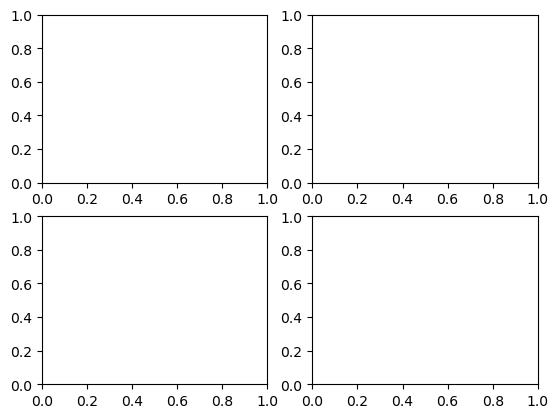

In [ ]:
# grafiquemos
fig, axs = plt.subplots(2, 2)

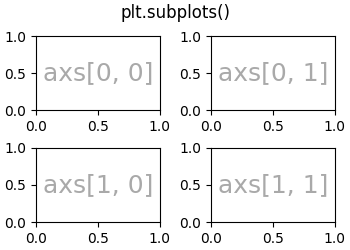

Usemos `subplot_mosaic()`

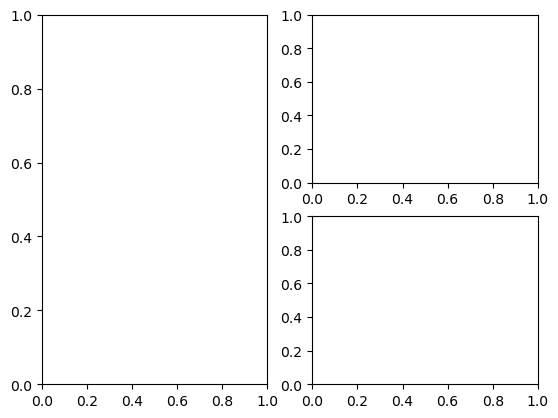

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplot_mosaic([["a", "b"], 
                               ["a", "c"]])

#axs["c"].scatter(x, y)

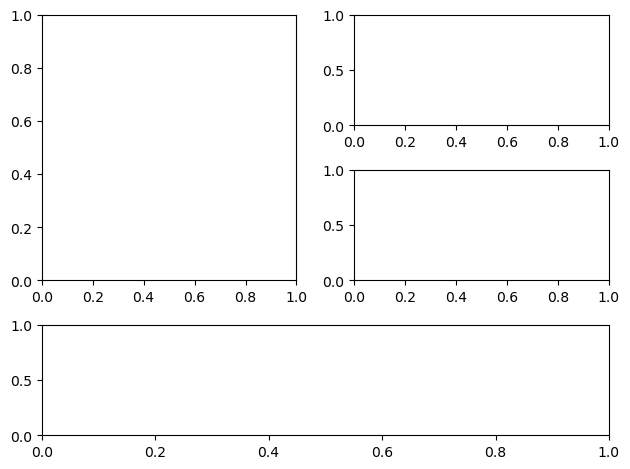

In [ ]:
mosaico = [["a", "b"],
           ["a", "c"],
           ["d", "d"]]

mosaico = """
ab
ac
dd
"""
fig, axs = plt.subplot_mosaic(mosaico, layout="tight")

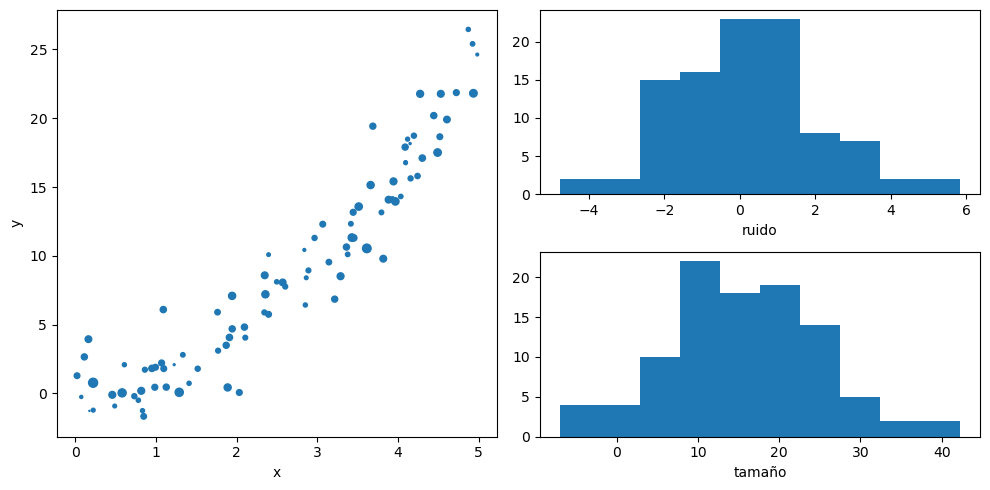

In [ ]:
fig, axs = plt.subplot_mosaic([["y", "ruido"],
                               ["y", "tamanio"]],
                               figsize=(10, 5),
                               layout="tight")

# y
axs["y"].scatter(x, y, s=tamanio)
axs["y"].set(xlabel="x",
             ylabel="y")
# ruido
axs["ruido"].hist(ruido)
axs["ruido"].set_xlabel("ruido")

# tamaño
axs["tamanio"].hist(tamanio)
axs["tamanio"].set_xlabel("tamaño")

plt.show()

## Agunos Links Útiles para Profundizar

### Python Manejo de Archivos 

* Artículo en español: https://www.freecodecamp.org/espanol/news/python-como-escribir-en-un-archivo-abrir-leer-escribir-y-otras-funciones-de-archivos-explicadas/

### Pandas

* Recomendado ver este curso de Pandas bastante cortito: https://www.kaggle.com/learn/pandas
* Lista de tutoriales oficiales de Pandas: https://pandas.pydata.org/docs/getting_started/intro_tutorials/

### Matplotlib

* Ejemplos: https://matplotlib.org/stable/gallery/index.html
* Tutorial de Inicio: https://matplotlib.org/stable/users/explain/quick_start.html 
* Marcadores (para Scatter): https://matplotlib.org/stable/api/markers_api.html
* Estilos de Línea: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
* Colormaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html

### Otras librerias para graficar:

#### Seaborn

Está construida sobre Matplotlib y simplifica muchos gráficos utilizados en análisis estadístico
https://seaborn.pydata.org/

#### Plotly

Se usa principalmente para gráficos pensados para la web. Sus plots son interactivos y es mucho más fácil hacer graficos en 3D
https://plotly.com/ 
